In [1]:
pip install NLTK

Note: you may need to restart the kernel to use updated packages.


In [2]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
import numpy as np
import pandas as pd

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [3]:
dataset = pd.read_csv("Book1.xls", )
dataset.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
dataset.isnull()

,v1,v2
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
5567,False,False
5568,False,False
5569,False,False
5570,False,False


In [5]:
dataset['v2'][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [6]:
dataset['v2'][2]

"Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"

In [7]:
print("Input data has {} rows, and {} columns".format(len(dataset), len(dataset.columns)))

Input data has 5572 rows, and 2 columns


In [8]:
print("Number of null in lable: {}".format(dataset['v1'].isnull().sum()))

Number of null in lable: 0


In [9]:
print("Number of null in Text: {}".format(dataset['v2'].isnull().sum()))

Number of null in Text: 0


In [10]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [11]:
def remove_punct(text):
    text_nopunct = "".join([char for char in text if char not in string.punctuation])
    return text_nopunct

dataset['body_text_clean'] = dataset['v2'].apply(remove_punct)

dataset.head()

,v1,v2,body_text_clean
0,ham,"Go until jurong point, crazy.. Available only ...",Go until jurong point crazy Available only in ...
1,ham,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say
4,ham,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...


In [12]:
import re

def tokenize(text):
    tokens = re.split(r'\W+',text)
    return tokens

dataset['body_text_tokenized'] = dataset['body_text_clean'].apply(lambda x:tokenize(x.lower()))


dataset.head()

,v1,v2,body_text_clean,body_text_tokenized
0,ham,"Go until jurong point, crazy.. Available only ...",Go until jurong point crazy Available only in ...,"[go, until, jurong, point, crazy, available, o..."
1,ham,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni,"[ok, lar, joking, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f..."
3,ham,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say,"[u, dun, say, so, early, hor, u, c, already, t..."
4,ham,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...,"[nah, i, dont, think, he, goes, to, usf, he, l..."


In [13]:
stopwords = nltk.corpus.stopwords.words('english')

def remove_stopwords(tokenized_list):
    text = [word for word in tokenized_list if word not in stopwords]
    return text

dataset['body_text_nostop'] = dataset['body_text_tokenized'].apply(lambda x:remove_stopwords(x))

dataset.head()

,v1,v2,body_text_clean,body_text_tokenized,body_text_nostop
0,ham,"Go until jurong point, crazy.. Available only ...",Go until jurong point crazy Available only in ...,"[go, until, jurong, point, crazy, available, o...","[go, jurong, point, crazy, available, bugis, n..."
1,ham,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni,"[ok, lar, joking, wif, u, oni]","[ok, lar, joking, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f...","[free, entry, 2, wkly, comp, win, fa, cup, fin..."
3,ham,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say,"[u, dun, say, so, early, hor, u, c, already, t...","[u, dun, say, early, hor, u, c, already, say]"
4,ham,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...,"[nah, i, dont, think, he, goes, to, usf, he, l...","[nah, dont, think, goes, usf, lives, around, t..."


In [14]:
ps = nltk.PorterStemmer()

def stemming(tokenized_text):
    text=[ps.stem(word) for word in tokenized_text]
    return text

dataset['body_text_stemmed'] = dataset['body_text_nostop'].apply(lambda x:stemming(x))

dataset.head()

,v1,v2,body_text_clean,body_text_tokenized,body_text_nostop,body_text_stemmed
0,ham,"Go until jurong point, crazy.. Available only ...",Go until jurong point crazy Available only in ...,"[go, until, jurong, point, crazy, available, o...","[go, jurong, point, crazy, available, bugis, n...","[go, jurong, point, crazi, avail, bugi, n, gre..."
1,ham,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni,"[ok, lar, joking, wif, u, oni]","[ok, lar, joking, wif, u, oni]","[ok, lar, joke, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f...","[free, entry, 2, wkly, comp, win, fa, cup, fin...","[free, entri, 2, wkli, comp, win, fa, cup, fin..."
3,ham,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say,"[u, dun, say, so, early, hor, u, c, already, t...","[u, dun, say, early, hor, u, c, already, say]","[u, dun, say, earli, hor, u, c, alreadi, say]"
4,ham,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...,"[nah, i, dont, think, he, goes, to, usf, he, l...","[nah, dont, think, goes, usf, lives, around, t...","[nah, dont, think, goe, usf, live, around, tho..."


In [15]:
wn = nltk.WordNetLemmatizer()

def lemmatizing(tokenized_text):
    text = [wn.lemmatize(word) for word in tokenized_text]
    return text

dataset['body_text-lemmatized'] = dataset['body_text_nostop'].apply(lambda x:lemmatizing(x))

dataset.head()

,v1,v2,body_text_clean,body_text_tokenized,body_text_nostop,body_text_stemmed,body_text-lemmatized
0,ham,"Go until jurong point, crazy.. Available only ...",Go until jurong point crazy Available only in ...,"[go, until, jurong, point, crazy, available, o...","[go, jurong, point, crazy, available, bugis, n...","[go, jurong, point, crazi, avail, bugi, n, gre...","[go, jurong, point, crazy, available, bugis, n..."
1,ham,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni,"[ok, lar, joking, wif, u, oni]","[ok, lar, joking, wif, u, oni]","[ok, lar, joke, wif, u, oni]","[ok, lar, joking, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f...","[free, entry, 2, wkly, comp, win, fa, cup, fin...","[free, entri, 2, wkli, comp, win, fa, cup, fin...","[free, entry, 2, wkly, comp, win, fa, cup, fin..."
3,ham,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say,"[u, dun, say, so, early, hor, u, c, already, t...","[u, dun, say, early, hor, u, c, already, say]","[u, dun, say, earli, hor, u, c, alreadi, say]","[u, dun, say, early, hor, u, c, already, say]"
4,ham,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...,"[nah, i, dont, think, he, goes, to, usf, he, l...","[nah, dont, think, goes, usf, lives, around, t...","[nah, dont, think, goe, usf, live, around, tho...","[nah, dont, think, go, usf, life, around, though]"


In [16]:
from sklearn.feature_extraction.text import CountVectorizer

def clean_text(text):
    text="".join([word.lower() for word in text if word not in string.punctuation])
    tokens=re.split(r'\W+', text)
    text=[ps.stem(word) for word in tokens if word not in stopwords]
    return text

count_vect= CountVectorizer(analyzer=clean_text)

X_count=count_vect.fit_transform(dataset['v2'])

print(X_count.shape)

(5572, 8096)


In [17]:
data_sample = dataset[0:20]

count_vect_sample= CountVectorizer(analyzer=clean_text)
X_count_sample= count_vect_sample.fit_transform(data_sample['v2'])

print(X_count_sample.shape)

(20, 222)


In [18]:
X_count_sample

<20x222 sparse matrix of type '<class 'numpy.int64'>'
	with 249 stored elements in Compressed Sparse Row format>

In [19]:
X_count_df= pd.DataFrame(X_count_sample.toarray())
X_count_df

,0,1,2,3,4,5,6,7,8,9,...,212,213,214,215,216,217,218,219,220,221
0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
import warnings
warnings.filterwarnings("ignore")

X_count_df.column= count_vect_sample.get_feature_names_out()
X_count_df

,0,1,2,3,4,5,6,7,8,9,...,212,213,214,215,216,217,218,219,220,221
0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect= TfidfVectorizer(analyzer= clean_text)
X_tfidf= tfidf_vect.fit_transform(dataset['v2'])

print(X_tfidf.shape)

(5572, 8096)


In [22]:
data_sample= dataset[0:20]

tfidf_vect_sample= TfidfVectorizer(analyzer=clean_text)
X_tfidf_sample= tfidf_vect_sample.fit_transform(data_sample['v2'])

print(X_tfidf_sample.shape)

(20, 222)


In [23]:
X_tfidf_df= pd.DataFrame(X_tfidf_sample.toarray())
X_tfidf_df.columns= tfidf_vect_sample.get_feature_names_out()
X_tfidf_df

,08002986030,08452810075over18,09061701461,1,100,11,12,150pday,16,2,...,word,world,wwwdbuknet,xxx,xxxmobilemovieclub,xxxmobilemovieclubcomnqjkgighjjgcbl,ye,螢100000,螢150,螢900
0,0.0000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.25,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.0000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.0000,0.198423,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.174417,...,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.0000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.0000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.0000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,...,0.188426,0.00,0.000000,0.237559,0.000000,0.000000,0.000000,0.000000,0.237559,0.000000
6,0.0000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.0000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.0000,0.000000,0.231645,0.000000,0.000000,0.0000,0.231645,0.000000,0.000000,0.000000,...,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.231645
9,0.1971,0.000000,0.000000,0.000000,0.000000,0.1971,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [24]:
dataset = pd.read_csv("Book1.xls", )

dataset.columns=['v1', 'v2']

dataset.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [25]:
dataset['body_len']= dataset['v2'].apply(lambda x:len(x)-x.count(" "))

dataset.head()

,v1,v2,body_len
0,ham,"Go until jurong point, crazy.. Available only ...",92
1,ham,Ok lar... Joking wif u oni...,24
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,128
3,ham,U dun say so early hor... U c already then say...,39
4,ham,"Nah I don't think he goes to usf, he lives aro...",49


In [27]:
def count_punct(text):
    count= sum([1 for char in text if char in string.punctuation])
    return round(count/(len(text)-text.count(" ")),3)*100

dataset['punct%']= dataset['v2'].apply(lambda x:count_punct(x))

dataset.head()

,v1,v2,body_len,punct%
0,ham,"Go until jurong point, crazy.. Available only ...",92,9.8
1,ham,Ok lar... Joking wif u oni...,24,25.0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,128,4.7
3,ham,U dun say so early hor... U c already then say...,39,15.4
4,ham,"Nah I don't think he goes to usf, he lives aro...",49,4.1


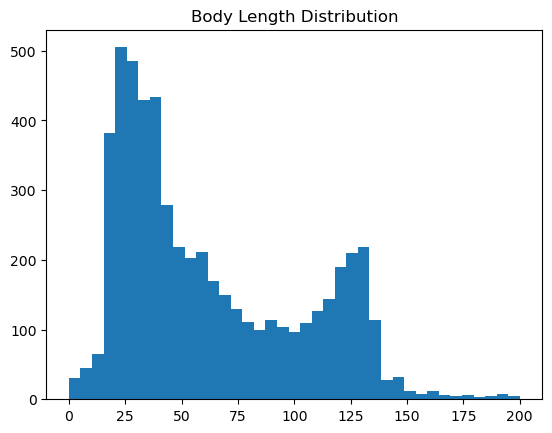

In [28]:
import matplotlib.pyplot as plt
import numpy as np

bins = np.linspace(0,200,40)

plt.hist(dataset['body_len'], bins)
plt.title('Body Length Distribution')
plt.show()

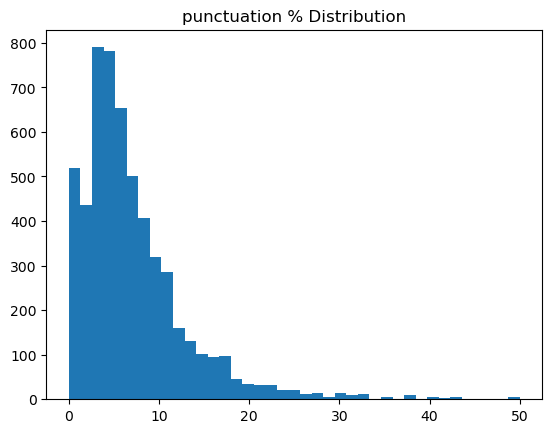

In [29]:
bins = np.linspace(0,50,40)

plt.hist(dataset['punct%'],bins)
plt.title('punctuation % Distribution')
plt.show()

In [30]:
import nltk
import pandas as pd
import re
from sklearn.feature_extraction.text import TfidfVectorizer
import string

In [31]:
dataset = pd.read_csv("Book1.xls", )

dataset.columns=['v1', 'v2']

dataset.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [32]:
def count_punct(text):
    count=sum([1 for char in text if char in string.punctuation])
    return round(count/(len(text)-text.count(" ")),3)*100

dataset['body_len']=dataset["v2"].apply(lambda x:len(x)-x.count(" "))
dataset['punct%']=dataset['v2'].apply(lambda x:count_punct(x))

dataset.head()

,v1,v2,body_len,punct%
0,ham,"Go until jurong point, crazy.. Available only ...",92,9.8
1,ham,Ok lar... Joking wif u oni...,24,25.0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,128,4.7
3,ham,U dun say so early hor... U c already then say...,39,15.4
4,ham,"Nah I don't think he goes to usf, he lives aro...",49,4.1


In [33]:
def clean_text(text):
    text="".join([word.lower() for word in text if word not in string.punctuation])
    tokens=re.split(r'\W+',text)
    text=[ps.stem(word) for word in tokens if word not in stopwords]
    return text

tfidf_vect=TfidfVectorizer(analyzer=clean_text)
X_tfidf=tfidf_vect.fit_transform(dataset['v2'])

In [34]:
X_features=pd.concat([dataset['body_len'],dataset['punct%'],pd.DataFrame(X_tfidf.toarray())],axis=1)
X_features.columns = X_features.columns.astype(str)
X_features.head()

,body_len,punct%,0,1,2,3,4,5,6,7,...,8086,8087,8088,8089,8090,8091,8092,8093,8094,8095
0,92,9.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,24,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,128,4.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,39,15.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,49,4.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [35]:
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import KFold, cross_val_score

In [36]:
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.model_selection import train_test_split

In [37]:
X_train, X_test, y_train, y_test= train_test_split(X_features, dataset['v1'],test_size=0.3,random_state=0)

In [38]:
rf=RandomForestClassifier(n_estimators=500, max_depth=20, n_jobs=-1)
rf_model=rf.fit(X_train, y_train)

In [39]:
sorted(zip(rf_model.feature_importances_,X_train.columns),reverse=True)[0:10]

[(0.058834827354846304, 'body_len'),
 (0.035804071987026925, '1756'),
 (0.034049666479360245, '7275'),
 (0.031220420743068356, '3092'),
 (0.028639052084756637, '1988'),
 (0.028423177648239255, '4745'),
 (0.020082590517150934, '5663'),
 (0.019246998139686975, '6677'),
 (0.017965407978557526, '5926'),
 (0.016478503587137806, '6958')]

In [40]:
y_pred= rf_model.predict(X_test)

precision, recall, fscore, support=score(y_test, y_pred, pos_label='spam',average='binary')

In [41]:
print('Precision {} / Recall {} / Accuracy {}'.format(round(precision,3),
                                                     round(recall,3),
                                                     round((y_pred==y_test).sum()/len(y_pred),3)))

Precision 1.0 / Recall 0.521 / Accuracy 0.932
